In [12]:
import os
import numpy as np
import nibabel as nib
from nibabel.testing import data_path
from matplotlib import pyplot as plt
# Set numpy to print only 2 decimal digits for neatness
np.set_printoptions(precision=2, suppress=True)

# example_filename = os.path.join(data_path, 'example4d.nii.gz')
# img = nib.load(example_filename)

# DATA FROM BROWED DATASET
# img = nib.load('./data/browsed/sub-01_ses-movie_task-movie_run-1_bold.nii').get_data()
# mask = nib.load('./data/browsed/sub-01_ses-movie_task-movie_run-1_defacemask.nii').get_data()

# DATA FROM OPENFMRI
img_nifti = nib.load('./data/sub-01_ses-movie_func_sub-01_ses-movie_task-movie_run-1_bold.nii')
mask_nifti = nib.load('./data/sub-01_ses-movie_func_sub-01_ses-movie_task-movie_run-1_defacemask.nii')

data = img_nifti.get_data()

In [4]:
img_nifti.shape

(80, 80, 35, 451)

In [5]:
img_nifti.get_data_dtype() == np.dtype(np.int16)

True

In [6]:
img_nifti.affine.shape

(4, 4)

In [8]:
data.shape

(80, 80, 35, 451)

In [9]:
type(data)

numpy.core.memmap.memmap

In [10]:
hdr = img_nifti.header
hdr.get_xyzt_units()

('mm', 'sec')

In [11]:
img_nifti.dataobj

In [12]:
img_nifti.affine

array([[ -3.  ,   0.08,   0.09, 117.62],
       [  0.06,   2.95,  -0.57, -98.02],
       [  0.1 ,   0.52,   3.25, -49.62],
       [  0.  ,   0.  ,   0.  ,   1.  ]])

In [13]:
header = img_nifti.header
print(header)
# https://brainder.org/2012/09/23/the-nifti-file-format/

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  80  80  35 451   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   3.   3.   3.3  2.   0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.011592761
quatern_c       : -0.9960713
quatern_d       : -0.0864995
qoffset_x       : 117.61775
qoffset_y       : -98.02272
qoffset_z       : -4

In [13]:
mask = mask_nifti.get_data()
mask = mask.astype(bool)

X = data[mask].T
X.shape

(451, 218140)

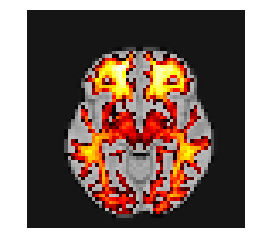

In [20]:
# https://github.com/AlexandreAbraham/frontiers2013/blob/master/scripts/visualization_101.py

# Load image
bg_img = nib.load(('./data/bg.nii.gz'))
bg = bg_img.get_data()
# Keep values over 4000 as activation map
act = bg.copy()
act[act < 6000] = 0.

# Display the background
plt.imshow(bg[..., 10].T, origin='lower', interpolation='nearest', cmap='gray')
# Mask background values of activation map
masked_act = np.ma.masked_equal(act, 0.)
plt.imshow(masked_act[..., 10].T, origin='lower', interpolation='nearest', cmap='hot')
# Cosmetics: disable axis
plt.axis('off')
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py

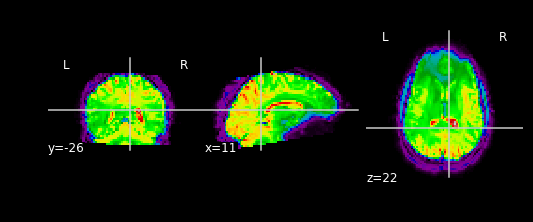

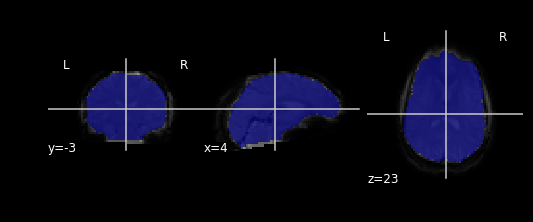

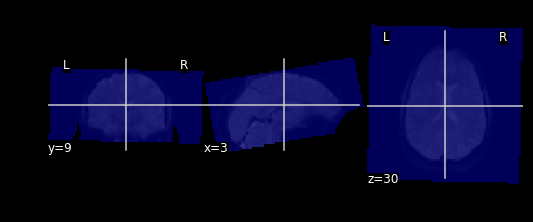

In [9]:
# http://nilearn.github.io/auto_examples/01_plotting/plot_visualization.html
from nilearn.image.image import mean_img
from nilearn.plotting import plot_epi, show
from nilearn.masking import compute_epi_mask
from nilearn.plotting import plot_roi

mean_sub_01 = mean_img('./data/sub-01_ses-movie_func_sub-01_ses-movie_task-movie_run-1_bold.nii')
plot_epi(mean_sub_01)

# Calculating the mask
mask_img = compute_epi_mask('./data/sub-01_ses-movie_func_sub-01_ses-movie_task-movie_run-1_bold.nii')
plot_roi(mask_img, mean_sub_01)

# Using the given mask instead
mask_sub_01 = mean_img('./data/sub-01_ses-movie_func_sub-01_ses-movie_task-movie_run-1_defacemask.nii')
plot_roi(mask_sub_01, mean_sub_01)

D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
D:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py

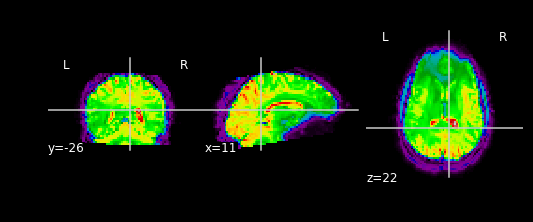

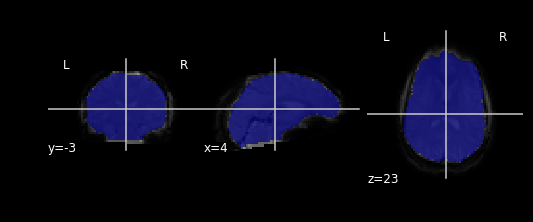

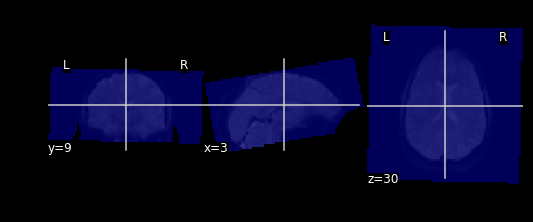

In [10]:
# Using data from the "browse datasets" section

mean_sub_01 = mean_img('./data/browsed/sub-01_ses-movie_task-movie_run-1_bold.nii')
plot_epi(mean_sub_01)

# Calculating the mask
mask_img = compute_epi_mask('./data/browsed/sub-01_ses-movie_task-movie_run-1_bold.nii')
plot_roi(mask_img, mean_sub_01)

# Using the given mask
mask_sub_01 = mean_img('./data/browsed/sub-01_ses-movie_task-movie_run-1_defacemask.nii')
plot_roi(mask_sub_01, mean_sub_01)

## Clustering tendency: Hopkins test

In [22]:
# https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-cluster-tendency/
# https://datascience.stackexchange.com/questions/14142/cluster-tendency-using-hopkins-statistic-implementation-in-python

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from random import sample
from numpy.random import uniform
from math import isnan

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

print(hopkins(X_scaled))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


0.6179372467039939


In [31]:
# Paper on clustering: http://www.mayaackerman.info/pub/clusterability2017.pdf
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

sel = VarianceThreshold()
X_scaled_filtered = sel.fit_transform(X_scaled)

pca = PCA(n_components=2)
X_scaled_filtered_decomp = pd.DataFrame(pca.fit_transform(X_scaled_filtered))

print(X_scaled_filtered_decomp.shape)
print(hopkins(X_scaled_filtered_decomp))

(451, 2)
0.9710804672278203


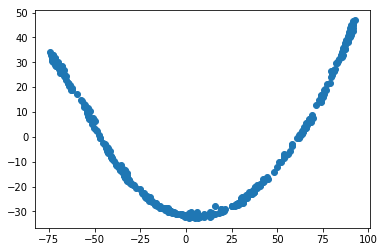

In [39]:
plt.scatter(X_scaled_filtered_decomp[0], X_scaled_filtered_decomp[1])
plt.show()

In [40]:
# ICA
from sklearn.decomposition import FastICA

transformer = FastICA(random_state=0)
X_ICA_transformed = transformer.fit_transform(X_scaled_filtered)



In [41]:
X_ICA_transformed.shape

(451, 451)